### Student Information
Name: Valentin Lhermitte

Student ID: X1140067

GitHub ID: Vlhermitte

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [37]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import helpers.data_mining_helpers as dmh

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
### Begin Assignment Here
reddit_df = pd.read_csv("newdataset/Reddit-stock-sentiment.csv")
reddit_df.head()

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


In [39]:
print(f"{reddit_df['author'].nunique()} unique authors")

731 unique authors


### Check for missing values

In [40]:
reddit_df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 2)
1      (The amoung of missing records is: , 2)
2      (The amoung of missing records is: , 2)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 2)
                        ...                   
842    (The amoung of missing records is: , 2)
843    (The amoung of missing records is: , 2)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 2)
846    (The amoung of missing records is: , 2)
Length: 847, dtype: object

In [41]:
# Find where are missing values
reddit_df[reddit_df.isnull().any(axis=1)]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0
5,comment,2025-04-12 2:19:03,mmo4k9g,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,PolarNimbus,https://www.reddit.com/r/wallstreetbets/commen...,16,NaN,NaN,"Hoping to ejaculate in wet warm puss tonight, ...",0.500000,0.250000,1.0,"['tonight', 'puss']",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,comment,2025-04-11 16:09:15,mml1qqd,StockMarket,The Trump administration is begging Xi Jinping...,le_mihai,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,So countries “begging to stop the tariffs” and...,0.000000,0.000000,0.0,"['”', '“', 'anything', 'deal']",1.0
842,comment,2021-06-30 4:06:06,h3iv6pq,stockstobuytoday,$MRIN Marin Software killed it today. Hope som...,Ordinary-Office9180,https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,Invest now it is going to shoot up tomorrow,0.000000,0.000000,0.0,['tomorrow'],1.0
843,comment,2025-04-11 5:01:24,mmijiuz,StockMarket,$ U.S. dollar value (crashing),lulububudu,https://i.redd.it/atvlo83gk4ue1.jpeg,2,NaN,NaN,Where can I read this?,0.000000,0.000000,0.0,[],0.0
845,comment,2025-04-11 20:13:26,mmmely7,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,yes_ur_wrong,https://www.reddit.com/r/wallstreetbets/commen...,10,NaN,NaN,i sold my puts so i expect cheeto to declare w...,0.000000,0.000000,0.0,"['war', 'denmark', 'cheeto', 'i']",-1.0


The only missing values are in the 'downvotes' and 'upvote_ratio' columns.

### Check for duplicates

In [42]:
sum(reddit_df.duplicated())

0

No duplicate found

### Let's do some plotting

In [43]:
columns = reddit_df.columns
print(columns.to_list())

['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url', 'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity', 'polarity', 'sentiment', 'entities', 'label']


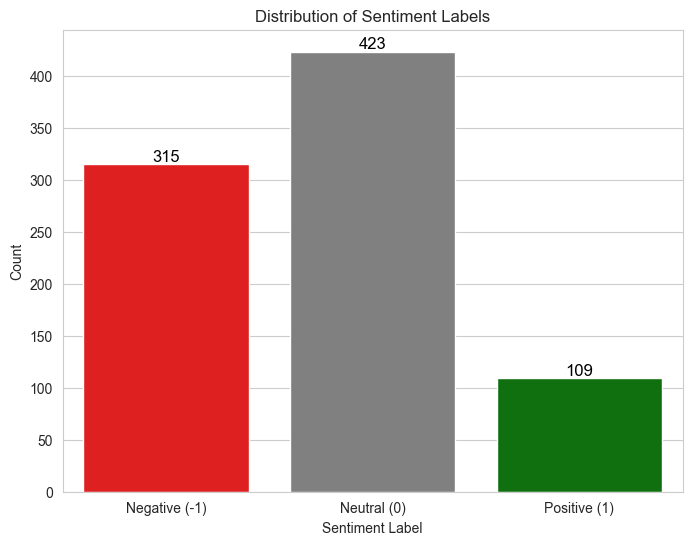

In [44]:
positive_count = (reddit_df['label'] == 1.0).sum()
neutral_count = (reddit_df['label'] == 0.0).sum()
negative_count = (reddit_df['label'] == -1.0).sum()

plt.figure(figsize=(8, 6))
ax = sns.countplot(data=reddit_df, x='label', order=[-1.0, 0.0, 1.0], palette=["red", "gray", "green"])
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Negative (-1)', 'Neutral (0)', 'Positive (1)'])
# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')

plt.show()

In [45]:
reddit_df['subreddit'].value_counts()

subreddit
stocks              274
StockMarket         250
stockstobuytoday    174
wallstreetbets      149
Name: count, dtype: int64

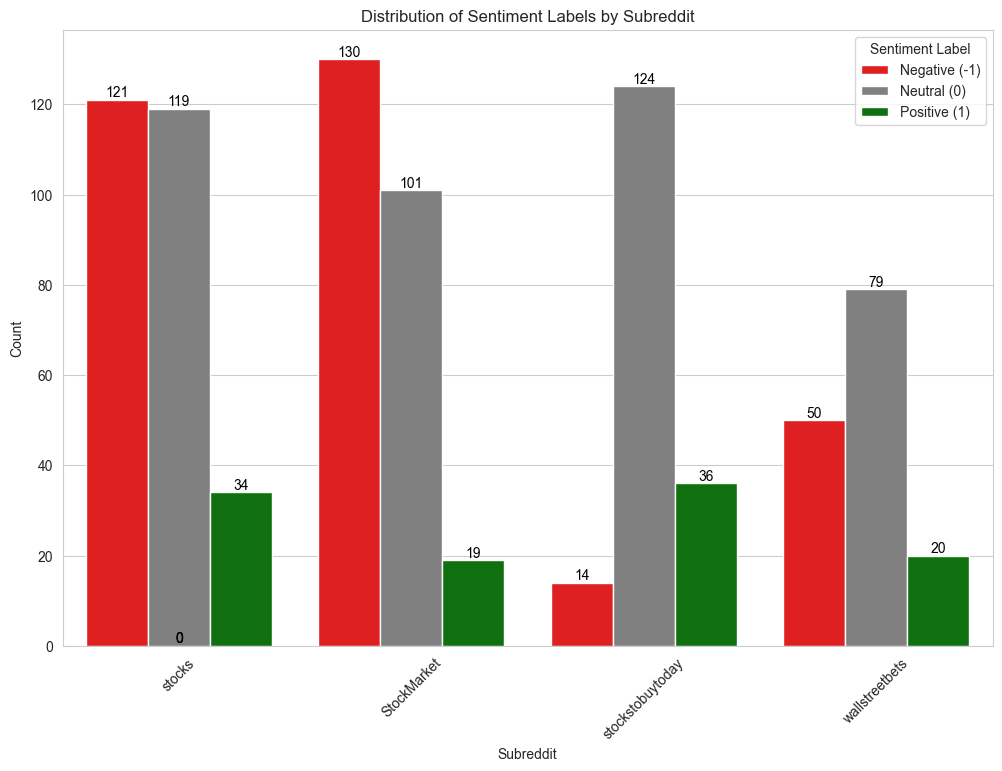

In [46]:
# Plot the ratio of sentiment labels for each subreddit
# This shows which subreddits have more positive, negative or neutral sentiments
plt.figure(figsize=(12, 8))
subreddit_order = reddit_df['subreddit'].value_counts().index
ax = sns.countplot(data=reddit_df, x='subreddit', hue='label', order=subreddit_order,
                   palette=["red", "gray", "green"])
plt.title('Distribution of Sentiment Labels by Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Count')
plt.xticks(rotation=45)
# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')
plt.legend(title='Sentiment Label', labels=['Negative (-1)', 'Neutral (0)', 'Positive (1)'])
plt.show()

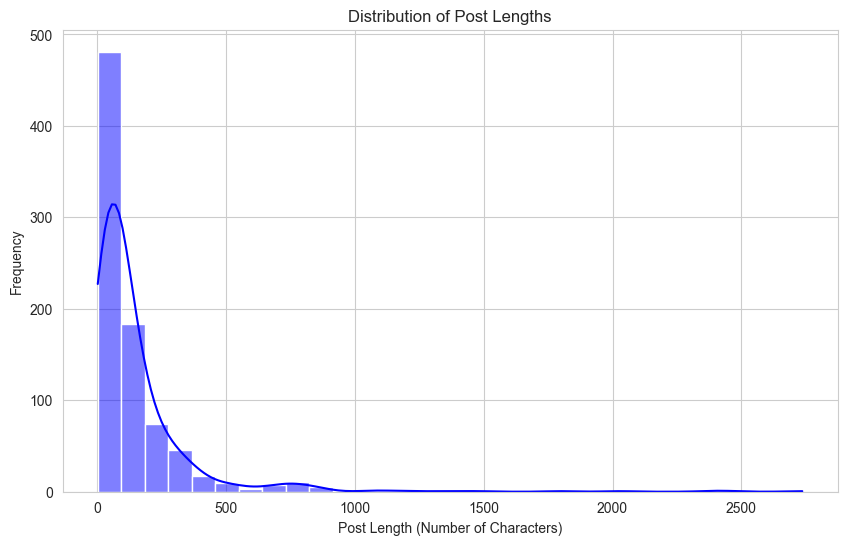

In [47]:
# Distribution of post lengths
reddit_df['post_length'] = reddit_df['text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(reddit_df['post_length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Post Lengths')
plt.xlabel('Post Length (Number of Characters)')
plt.ylabel('Frequency')
plt.show()

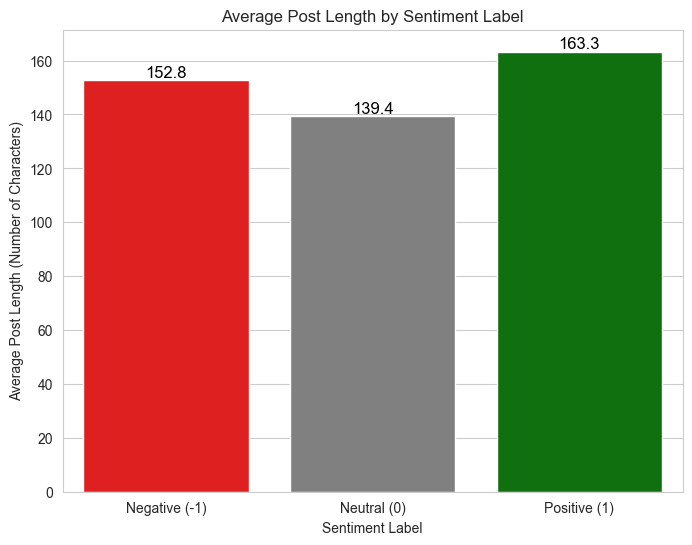

In [48]:
# Average post length by sentiment label
avg_post_length = reddit_df.groupby('label')['post_length'].mean().reset_index()
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=avg_post_length, x='label', y='post_length',
            palette=["red", "gray", "green"], order=[-1.0, 0.0, 1.0])
plt.title('Average Post Length by Sentiment Label')
plt.xlabel('Sentiment Label')
plt.ylabel('Average Post Length (Number of Characters)')
plt.xticks(ticks=[0, 1, 2], labels=['Negative (-1)', 'Neutral (0)', 'Positive (1)'])

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')

plt.show()

In [49]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = CountVectorizer(max_features=20, stop_words='english')
X = vectorizer.fit_transform(reddit_df['text'])
word_counts = np.asarray(X.sum(axis=0)).flatten()
words = vectorizer.get_feature_names_out()
word_freq_df = pd.DataFrame({'word': words, 'count': word_counts}).sort_values(by='count', ascending=False)

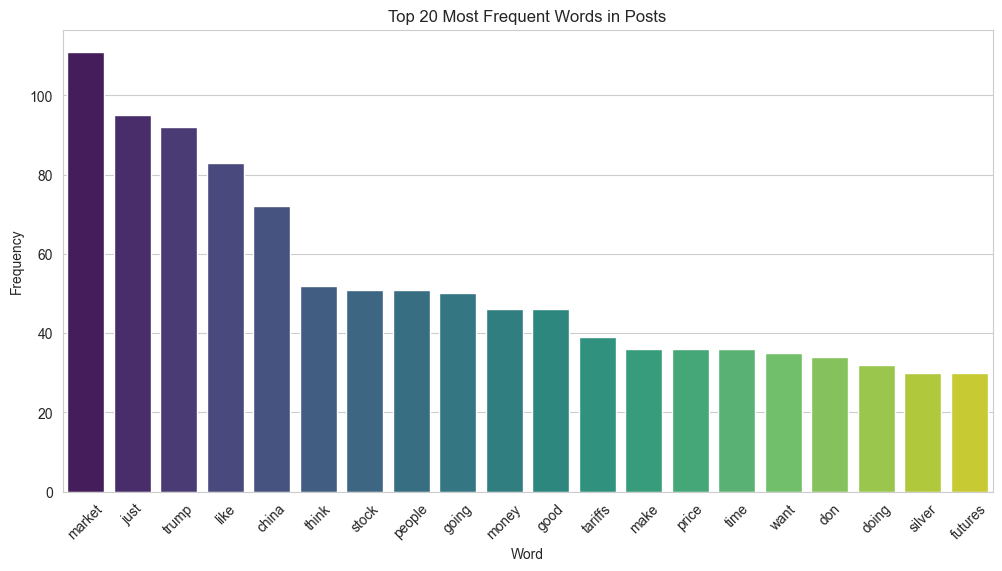

In [50]:
plt.figure(figsize=(12, 6))
sns.barplot(data=word_freq_df, x='word', y='count', palette='viridis')
plt.title('Top 20 Most Frequent Words in Posts')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

We can see that if we remove stop words, the most frequent words are related to stocks and trading, which makes sense given the context of the subreddit.

Intrestingly, word like Trump and China are also among the most frequent words, indicating that political events may have a significant impact on stock market discussions.

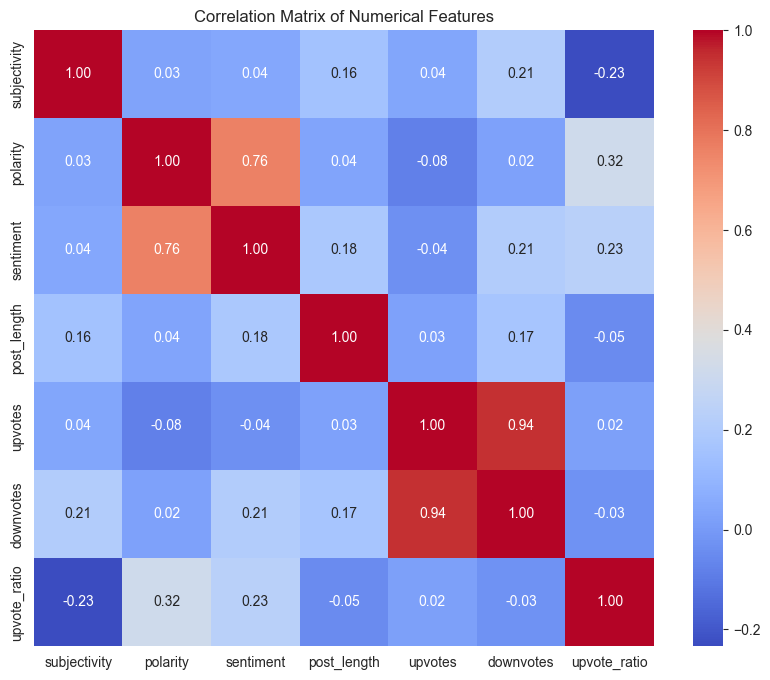

Missing values in 'upvotes': 0
Missing values in 'downvotes': 783
Missing values in 'upvote_ratio': 783


In [51]:
# Correlation between numerical features
numerical_cols = ['subjectivity', 'polarity', 'sentiment', 'post_length', 'upvotes', 'downvotes', 'upvote_ratio']
corr_matrix = reddit_df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# print number of missing values in upvotes, downvotes and upvote_ratio
print("Missing values in 'upvotes':", reddit_df['upvotes'].isnull().sum())
print("Missing values in 'downvotes':", reddit_df['downvotes'].isnull().sum())
print("Missing values in 'upvote_ratio':", reddit_df['upvote_ratio'].isnull().sum())

We can see that polarity and sentiment are highly correlated, which is expected since sentiment is derived from polarity. Subjectivity has a lower correlation with both polarity and sentiment.
The post length seems to have no correlation with the other polarity and sentiment.

Results on upvotes, downvotes and upvote_ratio are not very conclusive as there are many missing values in these columns.

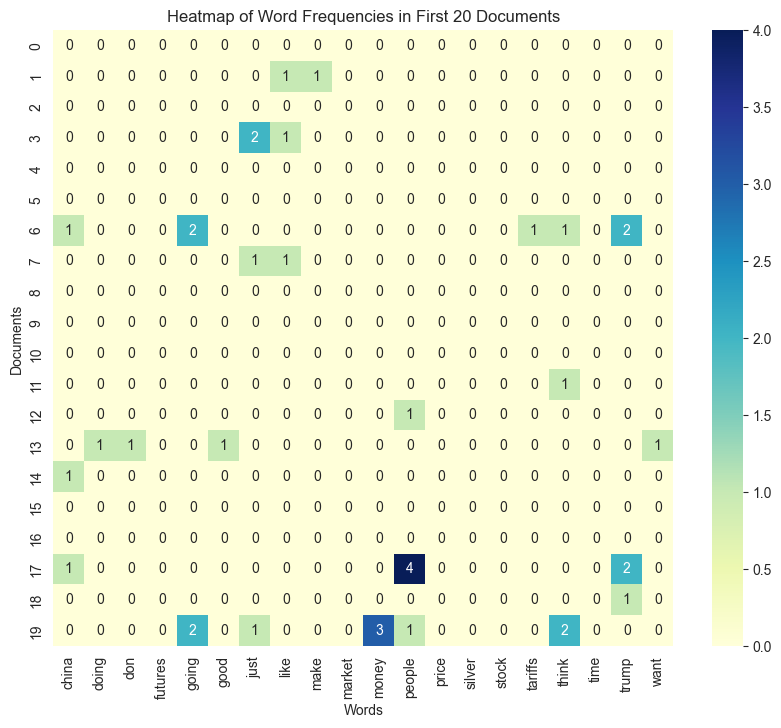

In [52]:
plot_x = [str(i) for i in vectorizer.get_feature_names_out()[0:20]]
plot_y = [str(i) for i in list(reddit_df.index)[0:20]]
plot_z = X[0:20, 0:20].toarray()

plt.figure(figsize=(10, 8))
sns.heatmap(plot_z, xticklabels=plot_x, yticklabels=plot_y, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Heatmap of Word Frequencies in First 20 Documents')
plt.xlabel('Words')
plt.ylabel('Documents')
plt.show()

# Phase 2

In [53]:
### Begin Assignment Here
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

CATEGORY = 'subreddit'
if CATEGORY not in reddit_df.columns:
    raise ValueError(f"Column '{CATEGORY}' not found in DataFrame.")

CATEGORIES = reddit_df[CATEGORY].unique().tolist()
print(f"Categories: {CATEGORIES}")

# Use a slightly larger vocab for pattern mining
fp_vectorizer = CountVectorizer(stop_words='english')
texts = reddit_df['text'].fillna("").astype(str)
X_counts = fp_vectorizer.fit_transform(texts)  # bag-of-words counts
X_bin = (X_counts > 0).astype(int)  # binary presence
vocab = np.array(fp_vectorizer.get_feature_names_out())
print(f"Docs: {X_bin.shape[0]}, Vocab: {X_bin.shape[1]}")

tdf = pd.DataFrame(X_bin.toarray(), columns=vocab, index=reddit_df.index)
tdf[CATEGORY] = reddit_df[CATEGORY].values

Categories: ['wallstreetbets', 'StockMarket', 'stockstobuytoday', 'stocks']
Docs: 847, Vocab: 4105


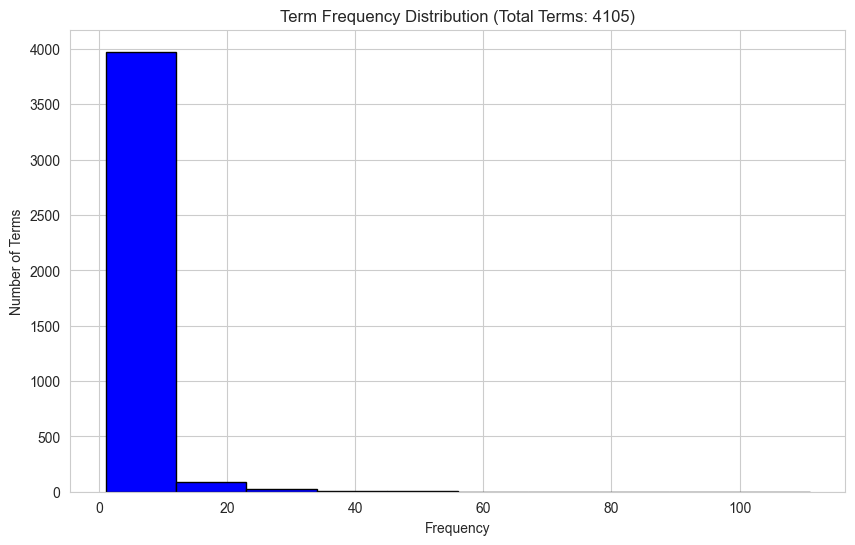

In [54]:
word_counts = np.asarray(X_counts.sum(axis=0)).flatten()

plt.figure(figsize=(10, 6))
plt.hist(word_counts, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution (Total Terms: {len(word_counts)})')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.show()

We filter the bottom 1%. We keep the top 5% words since we already removed stop words with `CountVectorizer(stop_words='english')`.

We observed that removing the top 5% words would remove very meaning full words from the vocabulary.

In [55]:
# Filter the bottom 1%
term_freq = tdf.drop(columns=CATEGORY).sum(axis=0)

total_terms = len(term_freq)
bottom_1 = max(1, int(0.01 * total_terms))

sorted_terms = term_freq.sort_values(ascending=False)
bottom_term = sorted_terms.tail(bottom_1)
words_to_remove = bottom_term.index.tolist()

filtered_terms_df = tdf.drop(columns=words_to_remove)

print(f"Number of terms in bottom 1%: {len(bottom_term)}")
print(f"Filtered terms: {bottom_term}\n")

print(f"Remaining Words = {len(filtered_terms_df.columns)}")
display(filtered_terms_df)

Number of terms in bottom 1%: 41
Filtered terms: climb            1
makers           1
closet           1
malignant        1
closes           1
manage           1
closer           1
manchild         1
mandate          1
manifestation    1
clint            1
clinics          1
manufactured     1
manufacturers    1
clinically       1
climbers         1
climbed          1
marine           1
mark             1
clothes          1
club             1
lucky            1
cluster          1
lumen            1
col              1
lunatic          1
lunch            1
lvmh             1
cohen            1
macro            1
cock             1
madman           1
coast            1
magnificent      1
magnitude        1
magnitudes       1
coal             1
mainly           1
maintain         1
cmcsa            1
zsil             1
dtype: int64

Remaining Words = 4064


,00,000,01378,02,027,03,06,08,10,100,...,yikes,yippee,yo,young,youtube,yoyo,yup,zero,zgld,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


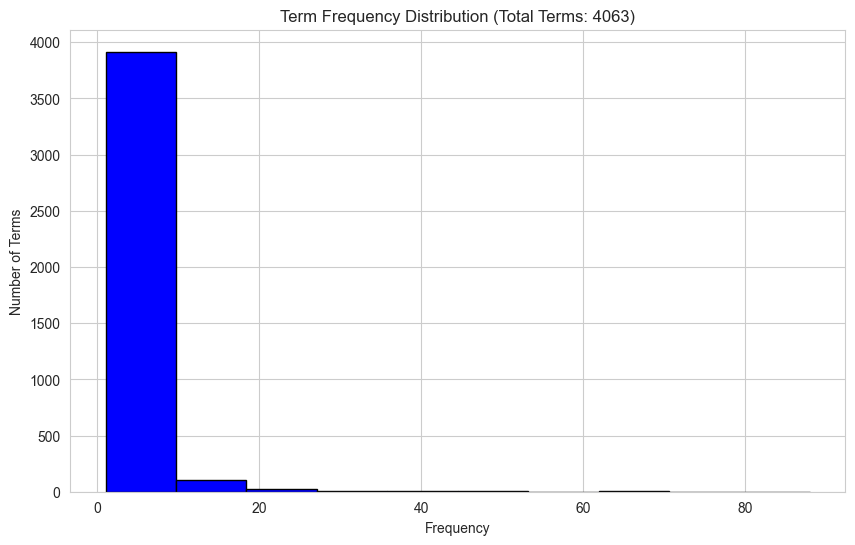

In [56]:
filtered_word_counts = np.asarray(filtered_terms_df.drop(columns=CATEGORY).sum(axis=0)).flatten()

plt.figure(figsize=(10, 6))
plt.hist(filtered_word_counts, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution (Total Terms: {len(filtered_word_counts)})')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.show()

In [57]:
from PAMI.extras.convert.DF2DB import DF2DB

subreddits = filtered_terms_df[CATEGORY].unique().tolist()
db_dict = {}
for subreddit in subreddits:
    subreddit_df = filtered_terms_df[filtered_terms_df[CATEGORY] == subreddit].drop(columns=CATEGORY)
    db = DF2DB(subreddit_df)
    db.convert2TransactionalDatabase(f'td_freq_db_{subreddit}.csv', '>=', 1)
    db_dict[subreddit] = db

------------------------------------ wallstreetbets ------------------------------------
Database size (total no of transactions) : 146
Number of items : 801
Minimum Transaction Size : 1
Average Transaction Size : 7.965753424657534
Maximum Transaction Size : 60
Standard Deviation Transaction Size : 8.173138750510175
Variance in Transaction Sizes : 67.26088804912612
Sparsity : 0.9900552391702153


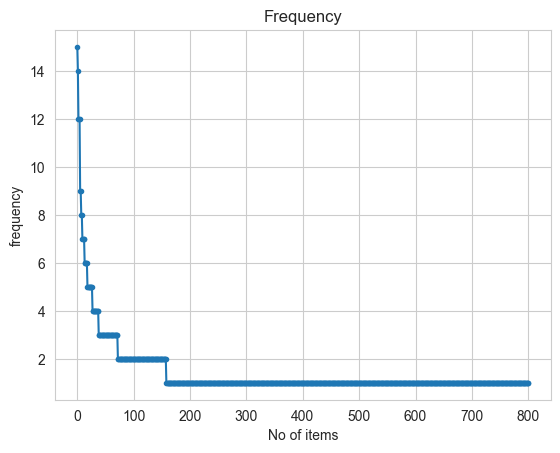

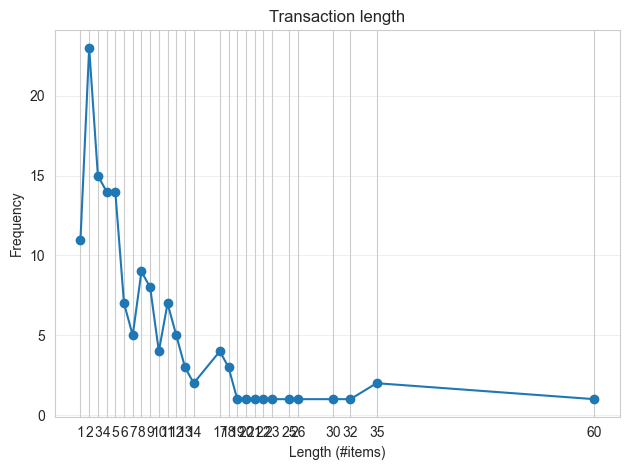

------------------------------------ StockMarket ------------------------------------
Database size (total no of transactions) : 248
Number of items : 1395
Minimum Transaction Size : 1
Average Transaction Size : 9.528225806451612
Maximum Transaction Size : 128
Standard Deviation Transaction Size : 11.057730185360704
Variance in Transaction Sizes : 122.76843084759044
Sparsity : 0.9931697306046942


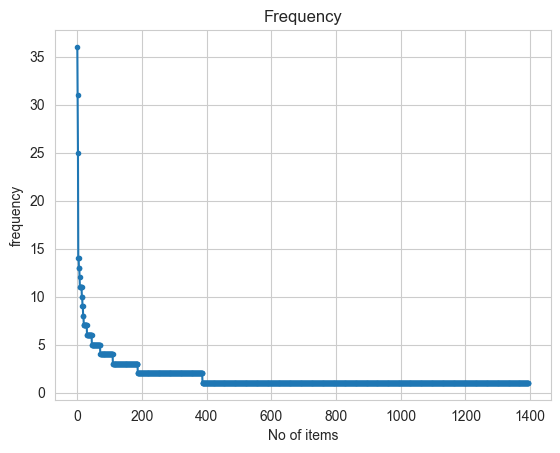

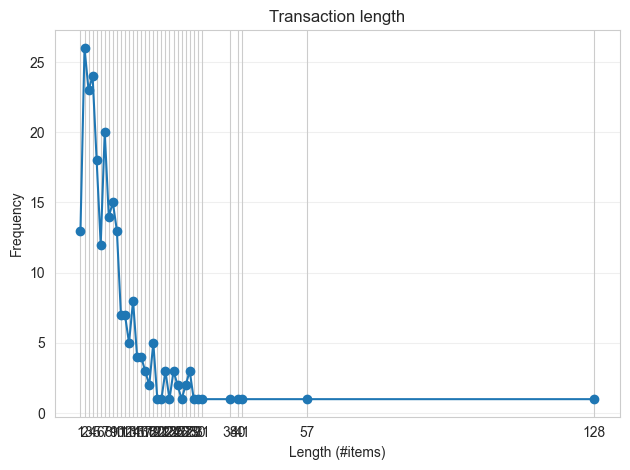

------------------------------------ stockstobuytoday ------------------------------------
Database size (total no of transactions) : 171
Number of items : 1424
Minimum Transaction Size : 1
Average Transaction Size : 13.90643274853801
Maximum Transaction Size : 198
Standard Deviation Transaction Size : 24.118191300389885
Variance in Transaction Sizes : 585.1088407292742
Sparsity : 0.9902342466653525


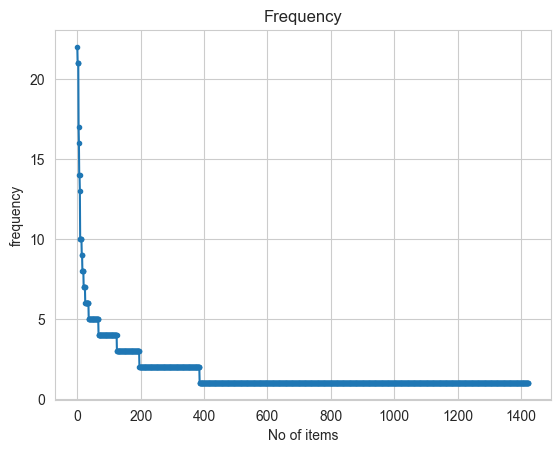

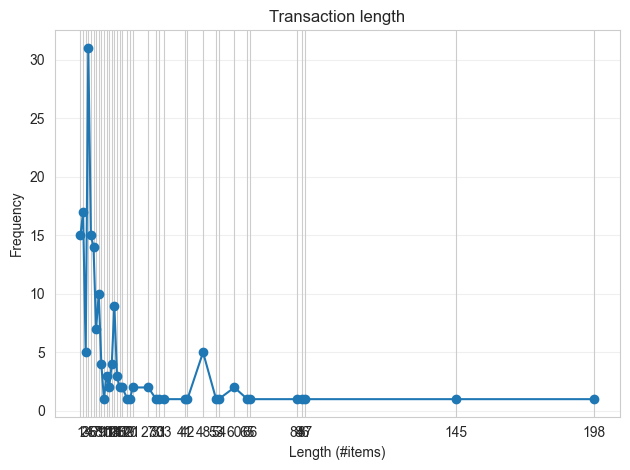

------------------------------------ stocks ------------------------------------
Database size (total no of transactions) : 274
Number of items : 2119
Minimum Transaction Size : 1
Average Transaction Size : 14.44890510948905
Maximum Transaction Size : 164
Standard Deviation Transaction Size : 16.691685140087362
Variance in Transaction Sizes : 279.6329108847357
Sparsity : 0.9931812623362487


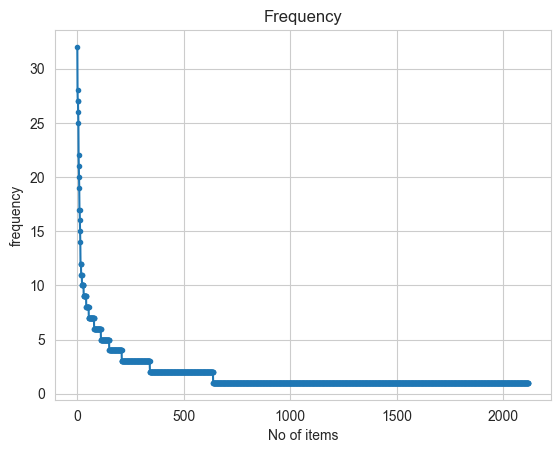

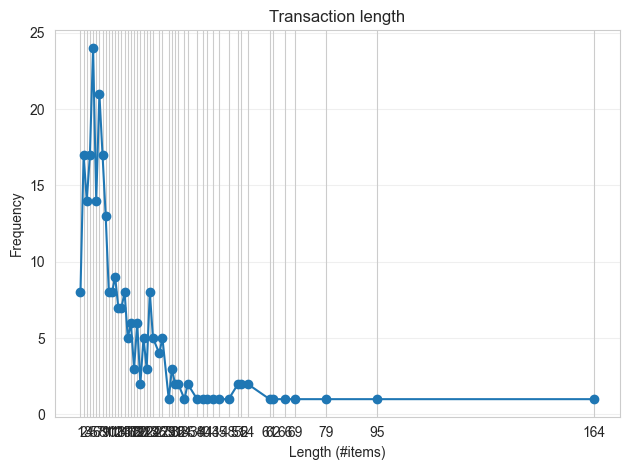

In [58]:
from PAMI.extras.dbStats import TransactionalDatabase as tds

for category in CATEGORIES:
    obj = tds.TransactionalDatabase(f'td_freq_db_{category}.csv')
    obj.run()
    print(f"------------------------------------ {category} ------------------------------------")
    obj.printStats()
    obj.plotGraphs()

## FP-Growth

In [59]:
from PAMI.frequentPattern.basic import FPGrowth as alg

minSup=5
dfs = []
for category in CATEGORIES:
    print(f"------------------------------------ {category} ------------------------------------")
    obj = alg.FPGrowth(iFile=f'td_freq_db_{category}.csv', minSup=minSup)
    obj.mine()
    frequentPatternsDF = obj.getPatternsAsDataFrame()
    dfs.append(frequentPatternsDF)
    obj.save(f'freq_patterns_{category}_minSup{minSup}.txt')
    print('Total No of patterns: ' + str(len(frequentPatternsDF)))
    print('Runtime: ' + str(obj.getRuntime()))

------------------------------------ wallstreetbets ------------------------------------
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 38
Runtime: 0.0008511543273925781
------------------------------------ StockMarket ------------------------------------
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 81
Runtime: 0.0015017986297607422
------------------------------------ stockstobuytoday ------------------------------------
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 16525
Runtime: 0.00556492805480957
------------------------------------ stocks ------------------------------------
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 176
Runtime: 0.002941131591796875


In [60]:
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

                                                Patterns  Support
16645                                             silver       22
16544                                  stockbuyvest\tcom       21
16533                                                com       21
16537                                       stockbuyvest       21
16531                                              x200b       17
...                                                  ...      ...
5571   market\tx200b\tdaily\tcharts\tcoinbase\tcrypto...        5
5572   market\tx200b\tdaily\tcharts\tcoinbase\tjasmyu...        5
5573   market\tx200b\tdaily\tcharts\tcryptocurrency\t...        5
5574   market\tx200b\tdaily\tcoinbase\tcryptocurrency...        5
8324                         cap\tethusd\tcharts\ttrends        5

[16649 rows x 2 columns]
Number of patterns discarded: 171


## Dimensionality Reduction with UMAP

In [61]:
import umap
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [63]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(reddit_df['text'].fillna("").astype(str))
tdm_df = pd.DataFrame(
    X.toarray(),
    columns=vectorizer.get_feature_names_out(),
    index=reddit_df.index
)

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_X = tfidf_vectorizer.fit_transform(reddit_df['text'].fillna("").astype(str))
tfidf_tdm_df = pd.DataFrame(
    tfidf_X.toarray(),
    columns=tfidf_vectorizer.get_feature_names_out(),
    index=reddit_df.index
)


reddit_df['tokenized_text'] = reddit_df['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=reddit_df.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = reddit_df['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)


pattern_matrix = pd.DataFrame(0, index=reddit_df.index, columns=final_pattern_df['Patterns'])

augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)
tfidf_augmented_df = pd.concat([tfidf_tdm_df, pattern_matrix], axis=1)

In [64]:
X_pca_tdm = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_tdm = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_tdm = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

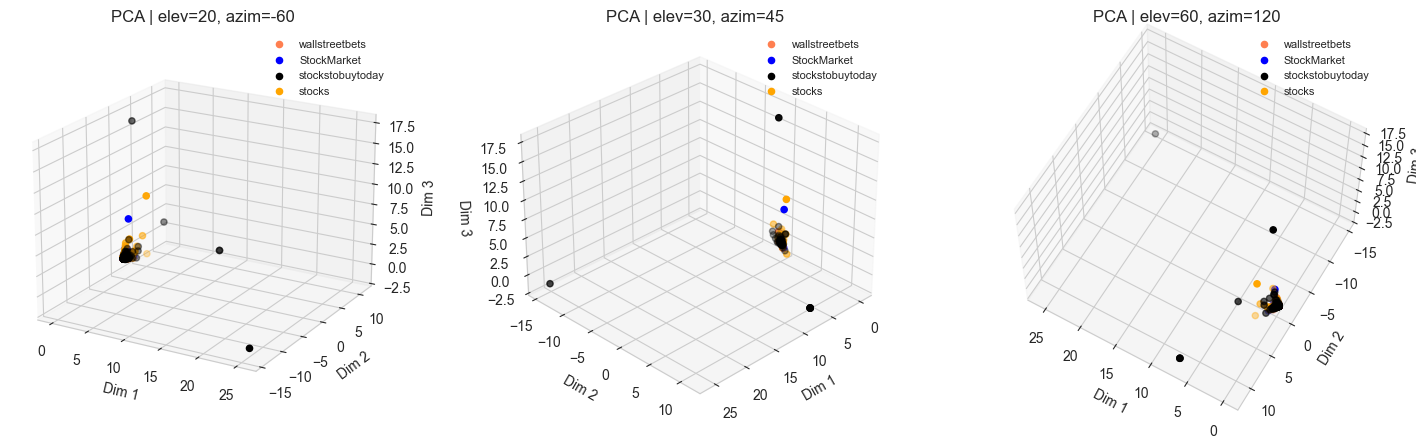

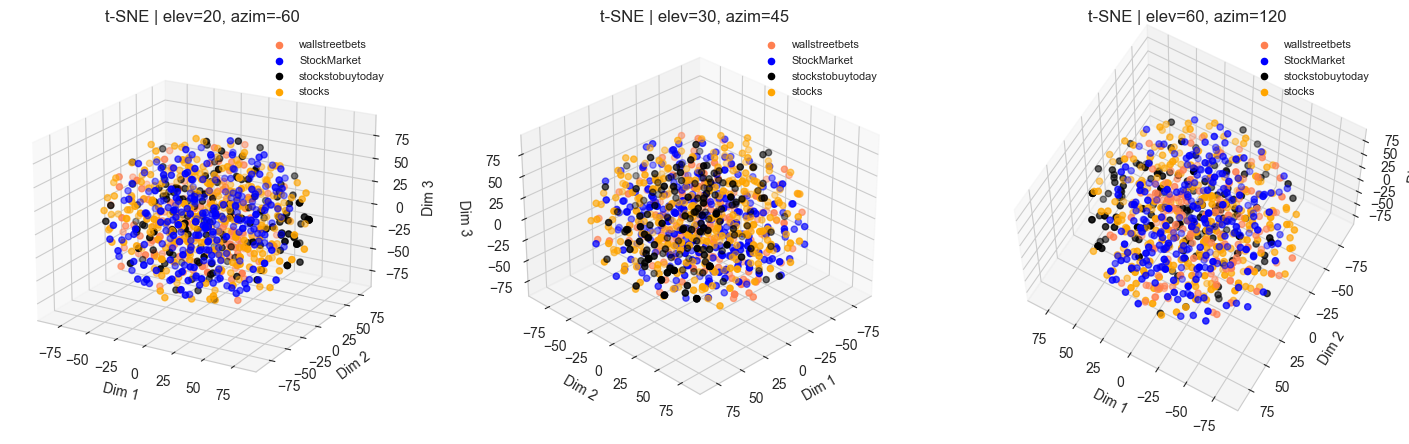

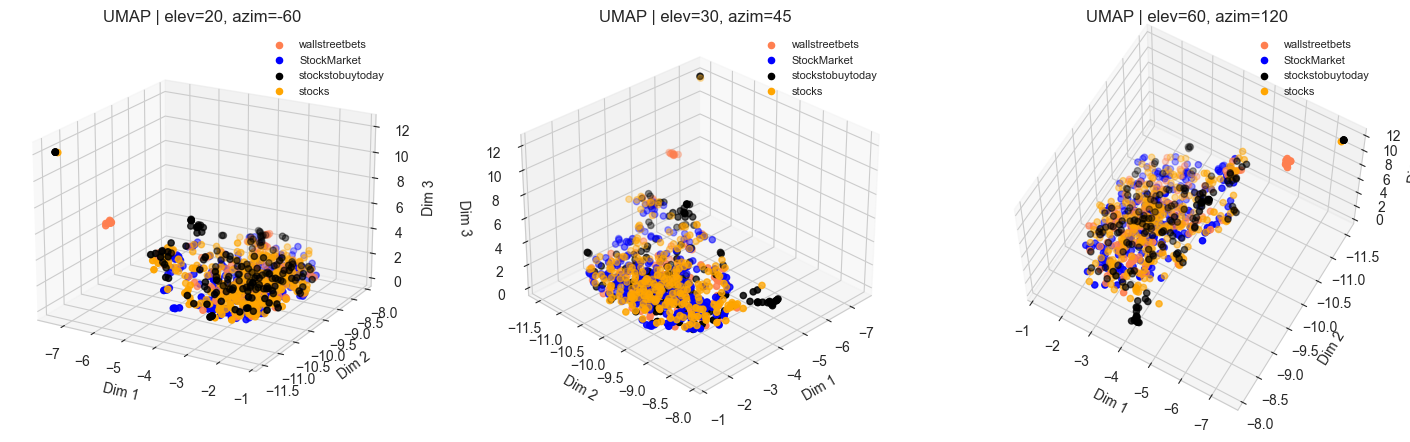

In [65]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']

def plot_3D_scatter(df, Xr, categories, angles=((20,-60),(30,45),(60,120)), title='3D plot'):
    fig = plt.figure(figsize=(18, 5))
    for i, (elev, azim) in enumerate(angles, start=1):
        ax3d = fig.add_subplot(1, 3, i, projection='3d')
        for c, category in zip(col, categories):
            mask = (df[CATEGORY] == category)
            xs = Xr[mask].T[0]
            ys = Xr[mask].T[1]
            zs = Xr[mask].T[2]
            ax3d.scatter(xs, ys, zs, c=c, marker='o', label=category)
        ax3d.legend(loc='best', fontsize=8, frameon=False)

        ax3d.view_init(elev=elev, azim=azim)
        ax3d.set_title(f"{title} | elev={elev}, azim={azim}")
        ax3d.set_xlabel("Dim 1")
        ax3d.set_ylabel("Dim 2")
        ax3d.set_zlabel("Dim 3")
    plt.show()

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_3D_scatter(reddit_df, X_pca_tdm, CATEGORIES, title='PCA')
plot_3D_scatter(reddit_df, X_tsne_tdm, CATEGORIES, title='t-SNE')
plot_3D_scatter(reddit_df, X_umap_tdm, CATEGORIES, title='UMAP')

In [66]:
from sklearn import preprocessing

In [67]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(reddit_df.subreddit)

LabelBinarizer()

In [68]:
reddit_df[f'bin_{CATEGORY}'] = mlb.transform(reddit_df[CATEGORY]).tolist()
reddit_df.head()

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,post_length,tokenized_text,bin_subreddit
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0,16,"{retards, on, Calls}","[0, 0, 0, 1]"
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0,137,"{they, should, company, about, it, place?, in,...","[0, 0, 0, 1]"
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0,33,"{the, Seeing, ticker., lots, red, of, in}","[1, 0, 0, 0]"
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0,1067,"{innovation., unthinkable, cutting-edge, highl...","[0, 0, 1, 0]"
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0,24,"{didn’t, you., He, say, thank}","[1, 0, 0, 0]"


## Naive Bayes Classifier

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

In [80]:
# Prepare input data
texts = reddit_df["text"].fillna("").astype(str).values

# In phase 1 I choose to use 'sentiment' column,
# but I found that 'label' column has less misclassification issues.
labels = reddit_df["label"].astype(float).values

In [81]:
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(
    augmented_df.values, labels, test_size=0.2, random_state=42, stratify=labels
)

# Train the Naive Bayes classifier
nb_classifier_aug = MultinomialNB()
nb_classifier_aug.fit(X_train_aug, y_train_aug)

# Make predictions on the test set
y_pred_aug = nb_classifier_aug.predict(X_test_aug)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test_aug, y_pred_aug))
print("\nClassification Report:\n", classification_report(y_test_aug, y_pred_aug, digits=3))

Accuracy: 0.5823529411764706

Classification Report:
               precision    recall  f1-score   support

        -1.0      0.533     0.635     0.580        63
         0.0      0.621     0.694     0.656        85
         1.0      0.000     0.000     0.000        22

    accuracy                          0.582       170
   macro avg      0.385     0.443     0.412       170
weighted avg      0.508     0.582     0.543       170



In [82]:
# With tf-idf
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(
    tfidf_augmented_df.values, labels, test_size=0.2, random_state=42, stratify=labels
)

tfidf_nb_classifier_aug = MultinomialNB()
tfidf_nb_classifier_aug.fit(X_train_aug, y_train_aug)

# Make predictions on the test set
y_pred_aug = tfidf_nb_classifier_aug.predict(X_test_aug)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test_aug, y_pred_aug))
print("\nClassification Report:\n", classification_report(y_test_aug, y_pred_aug, digits=3))

Accuracy: 0.6058823529411764

Classification Report:
               precision    recall  f1-score   support

        -1.0      0.676     0.397     0.500        63
         0.0      0.586     0.918     0.716        85
         1.0      0.000     0.000     0.000        22

    accuracy                          0.606       170
   macro avg      0.421     0.438     0.405       170
weighted avg      0.544     0.606     0.543       170



Let's try another model to see if it performs better

In [83]:
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(
    tfidf_augmented_df.values, labels, test_size=0.2, random_state=42, stratify=labels
)

svm_classifier_aug = LinearSVC(class_weight="balanced")
svm_classifier_aug.fit(X_train_aug, y_train_aug)

# Make predictions on the test set
y_pred_aug = svm_classifier_aug.predict(X_test_aug)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test_aug, y_pred_aug))
print("\nClassification Report:\n", classification_report(y_test_aug, y_pred_aug, digits=3))

Accuracy: 0.6176470588235294

Classification Report:
               precision    recall  f1-score   support

        -1.0      0.635     0.524     0.574        63
         0.0      0.616     0.812     0.701        85
         1.0      0.500     0.136     0.214        22

    accuracy                          0.618       170
   macro avg      0.584     0.491     0.496       170
weighted avg      0.608     0.618     0.591       170

